# Problem Statement

Wine Quality Prediction-
Here, we will apply a method of assessing wine quality using a decision tree, and test it against the wine-quality dataset from the UC Irvine Machine Learning Repository.



The wine dataset is a classic and very easy multi-class classification dataset.
Find more about data here - https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
#Import all the necessary modules

# To enable plotting graphs in Jupyter notebook
%matplotlib inline
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

# Q1. Load the Wine Data file into Python DataFrame. 


Let us assume the data frame is named wine_df


In [3]:
# reading the CSV file into pandas dataframe
wine_df = pd.read_csv("winequality-red.csv")  

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset.

# Q2. Print 10 samples from the dataset

In [4]:
wine_df.sample(10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
648             8.7             0.480         0.30             2.8      0.066   
40              7.3             0.450         0.36             5.9      0.074   
260             7.9             0.330         0.23             1.7      0.077   
378            11.4             0.625         0.66             6.2      0.088   
23              8.5             0.490         0.11             2.3      0.084   
36              7.8             0.600         0.14             2.4      0.086   
581            12.3             0.500         0.49             2.2      0.089   
956             9.0             0.360         0.52             2.1      0.111   
458            10.4             0.330         0.63             2.8      0.084   
1141            8.2             0.380         0.32             2.5      0.080   

      free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
648                  10.0                  28.0  0.99640  3.33       0.67   
40                   12.0                  87.0  0.99780  3.33       0.83   
260                  18.0                  45.0  0.99625  3.29       0.65   
378                   6.0                  24.0  0.99880  3.11       0.99   
23                    9.0                  67.0  0.99680  3.17       0.53   
36                    3.0                  15.0  0.99750  3.42       0.60   
581                   5.0                  14.0  1.00020  3.19       0.44   
956                   5.0                  10.0  0.99568  3.31       0.62   
458                   5.0                  22.0  0.99980  3.26       0.74   
1141                 24.0                  71.0  0.99624  3.27       0.85   

      alcohol  quality  
648      11.2        7  
40       10.5        5  
260       9.3        5  
378      13.3        6  
23        9.4        5  
36       10.8        6  
581       9.6        5  
956      11.3        6  
458      11.2        7  
1141     11.0        6

In [5]:
wine_df.head(10)

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   
5                 13.0                  40.0   0.9978  3.51       0.56   
6                 15.0                  59.0   0.9964  3.30       0.46   
7                 15.0                  21.0   0.9946  3.39       0.47   
8                  9.0                  18.0   0.9968  3.36       0.57   
9                 17.0                 102.0   0.9978  3.35       0.80   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5  
5      9.4        5  
6      9.4        5  
7     10.0        7  
8      9.5        7  
9     10.5        5

# Q3 Print the datatypes of each column and the shape of the dataset 

In [6]:
wine_df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
wine_df.shape

(1599, 12)

# Q4 Print the descriptive statistics of each & every column using describe() function

In [8]:
wine_df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

# Q5 Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes).

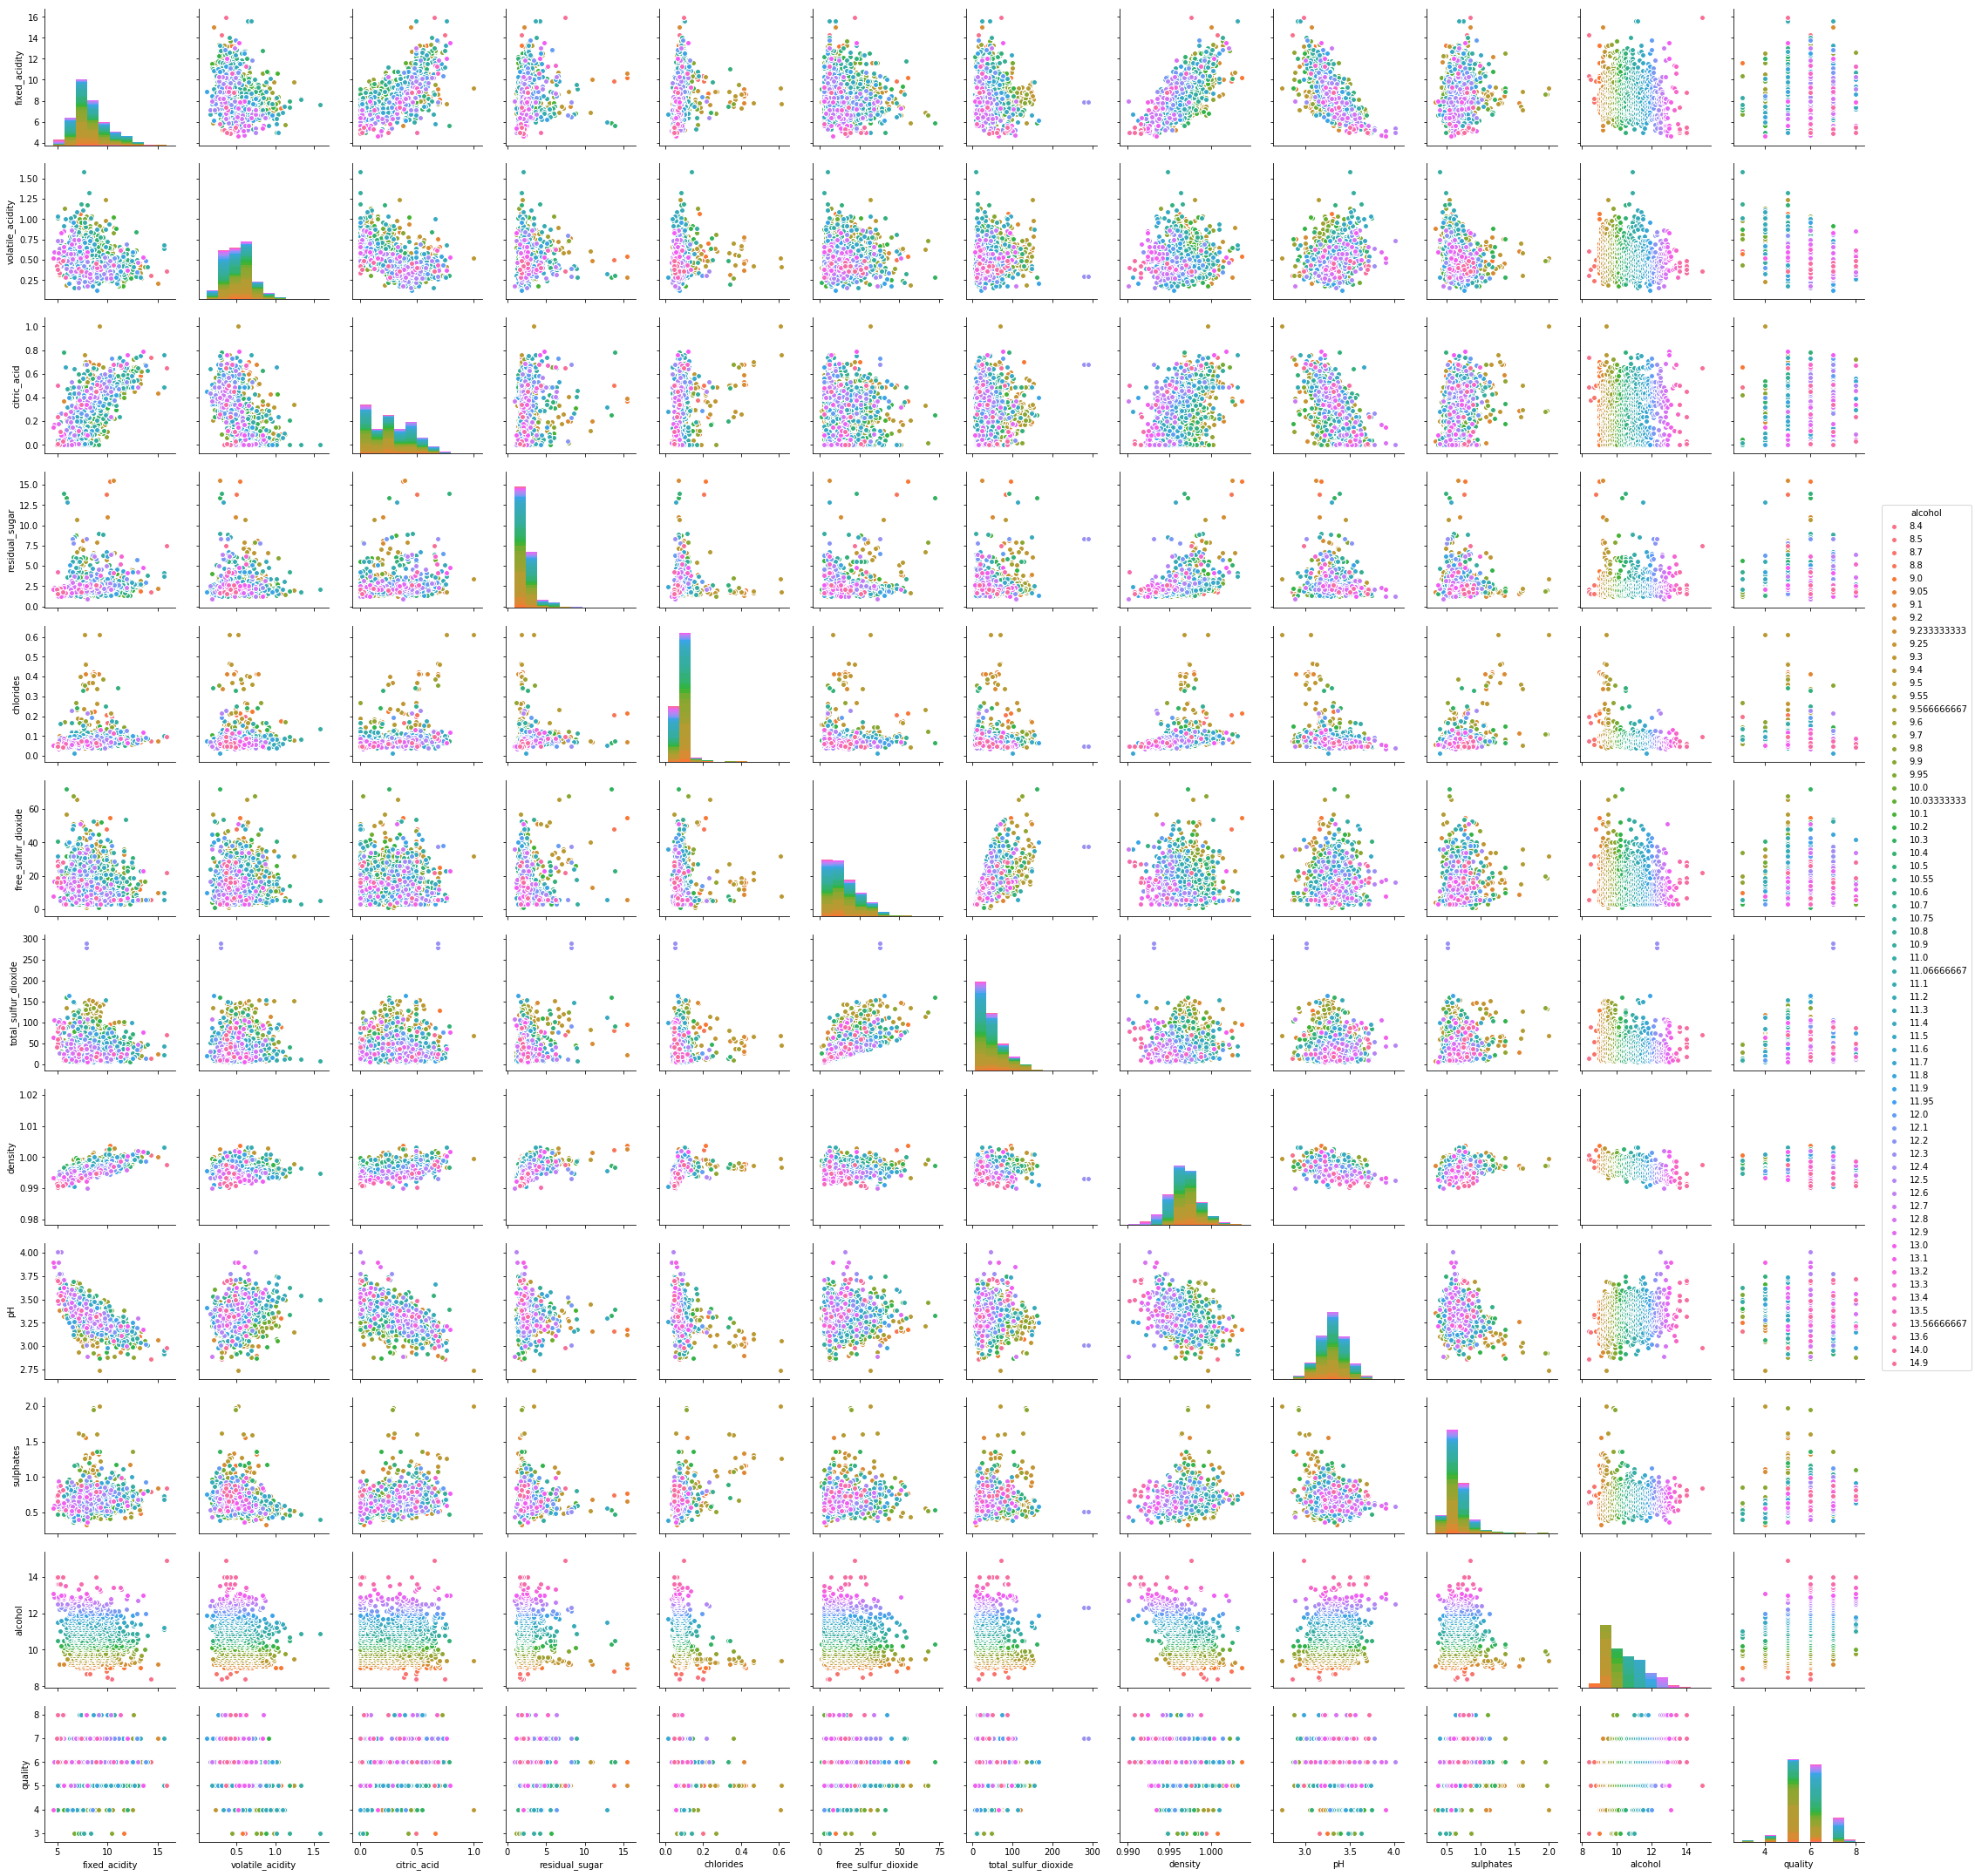

In [9]:
sns.pairplot(wine_df, hue = "alcohol")

In [10]:
#pH value attribute follows a normal distribution
#Total sulphur dioxide attribute seems to have an exponential distribution

# Q6. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


C:\SAIRAM\Anaconda3_5.2version\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\SAIRAM\Anaconda3_5.2version\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


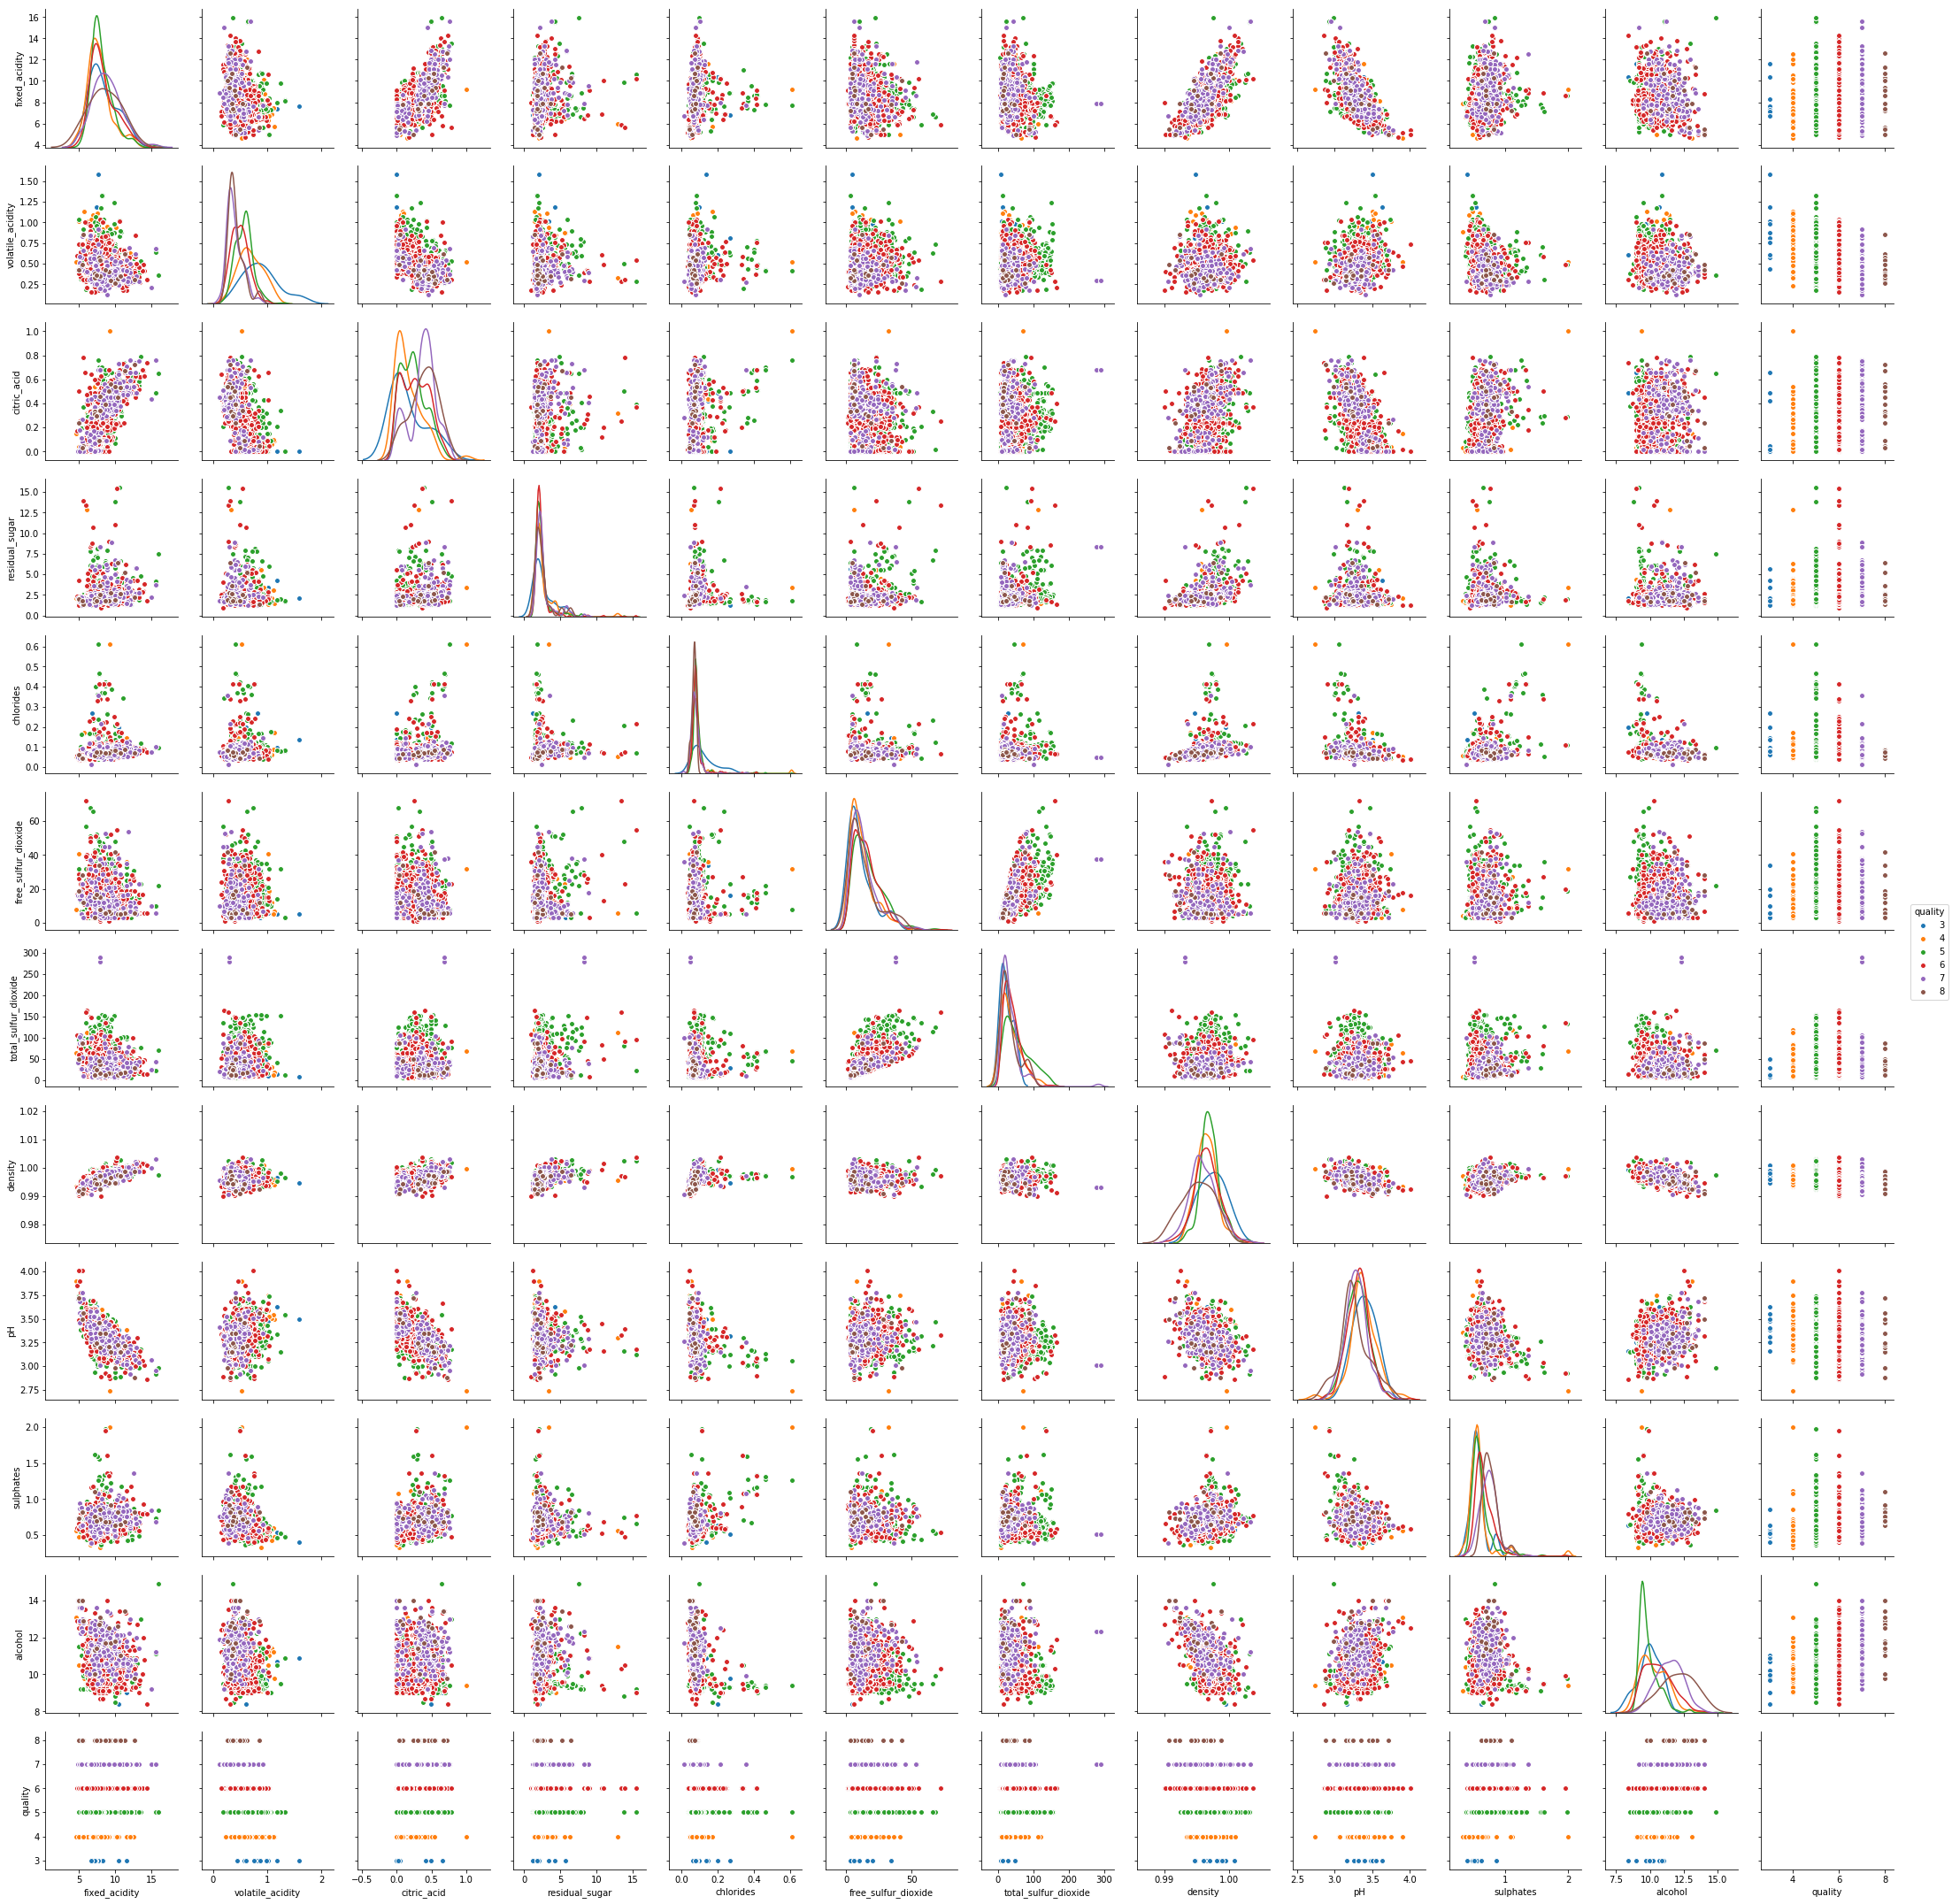

In [11]:
sns.pairplot(wine_df, hue = "quality",diag_kind = 'kde')

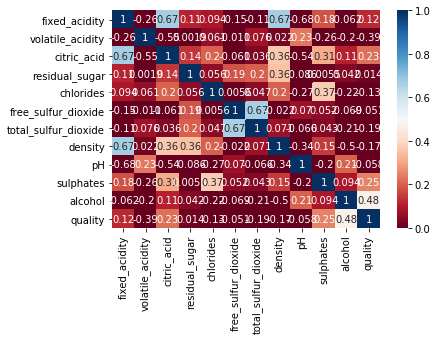

In [12]:
sns.heatmap(wine_df[['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'pH','sulphates','alcohol','quality']].corr(),annot =True,vmin =0,vmax =1,cmap = 'RdBu')

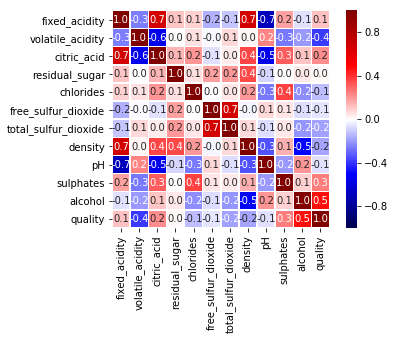

In [14]:
sns.heatmap(wine_df.corr(),annot=True,fmt=".1f",linewidths=.5,square=True,vmin=-1,vmax=1,cmap='seismic')

In [15]:
#Fixed acidity and density seems to be positively correlated while pH and fixed acidity are negatively corelated
# Also the pH seems to have negative correlation with acid related variables.
# Alcohol and quality of the wine seem to have positive correlation while density and quality seems to have a negative correlation
# Residual sugar and QUality doesn't seem to be correlated (there is no effect on quality with reference to residual sugar variable)

# Q7 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test) based on dependent and independent variables.



In [16]:
array = wine_df.values
X = array[:,0:10] # select all rows and first 11 columns which are the attributes
Y = array[:,11]   # select all rows and the 12th column which is the quality parameter
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Q8 Create the decision tree model using “entropy” method of finding the split columns and fit it to training data.




In [17]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [18]:
print(dt_model.score(X_test , Y_test))
print(dt_model.score(X_train , Y_train))
# Since the training data is 100% accurate and not the test data, this is a clear case of Overfit moel

0.6041666666666666
1.0


In [19]:
from sklearn import metrics
Y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(Y_test, Y_predict))

[[  0   0   1   0   0   0]
 [  1   2   9   8   2   0]
 [  1   1 138  38  10   1]
 [  2   8  45 120  27   3]
 [  0   0   6  19  29   4]
 [  0   0   1   2   1   1]]


# Q10. Regularize the decision tree by limiting the max. depth of trees and print the accuracy.

In [20]:
reg_dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 18)
reg_dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=18,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [21]:
Y_predict = reg_dt_model.predict(X_test)

In [33]:
reg_dt_model.score(X_test , Y_test)
#print(metrics.confusion_matrix(Y_test, Y_predict)) Printing only the accuracy and not the confusion matrix

0.6

# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, Y_train)

In [24]:
dt_model.score(X_test , Y_test)
#print(metrics.confusion_matrix(Y_test, Y_predict)) Printing only the accuracy and not the confusion matrix

0.6041666666666666

# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [25]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, Y_train)

In [26]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , Y_test))
#print(metrics.confusion_matrix(Y_test, Y_predict)) Printing only the accuracy and not the confusion matrix

0.42083333333333334


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [27]:
from sklearn.ensemble import BaggingClassifier
# by default the algorithm it takes is Decision tree if not specified
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50) # base estimator is the first instance

#bgcl = BaggingClassifier(n_estimators=50)
bgcl = bgcl.fit(X_train, Y_train)
#print(metrics.confusion_matrix(Y_test, Y_predict)) Printing only the accuracy and not the confusion matrix

In [28]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , Y_test))

0.6604166666666667


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)
gbcl = gbcl.fit(X_train, Y_train)

In [30]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , Y_test))
#print(metrics.confusion_matrix(Y_test, Y_predict))

0.6333333333333333


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.